#Connecting with kaggle for data transfer

In [ ]:
!pip install opendatasets
import opendatasets as od

od.download("https://www.kaggle.com/datasets/lukechugh/best-alzheimer-mri-dataset-99-accuracy")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abdelrahmanaymann
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/lukechugh/best-alzheimer-mri-dataset-99-accuracy


100%|██████████| 71.5M/71.5M [00:00<00:00, 158MB/s]


#Categorizing Data

In [ ]:
# Importing libraries
import tensorflow as tf
import os
import numpy as np
from sklearn.model_selection import train_test_split

# The directory containing our dataset
data_dir = "/content/best-alzheimer-mri-dataset-99-accuracy/Combined Dataset/train"

# Collecting the pathways to partition the data into the training, test, and validation datasets by functions below
file_paths = []
labels = []

for label, class_dir in enumerate(sorted(os.listdir(data_dir))):
    class_path = os.path.join(data_dir, class_dir)
    if os.path.isdir(class_path):
        for file_name in os.listdir(class_path):
            file_paths.append(os.path.join(class_path, file_name))
            labels.append(label)

file_paths = np.array(file_paths)
labels = np.array(labels)

# Training 70% and remaining 30% for testing and validation
train_paths, temp_paths, train_labels, temp_labels = train_test_split(file_paths, labels, test_size=0.3, random_state=42, stratify=labels)

# testing and validation 15% each
val_paths, test_paths, val_labels, test_labels = train_test_split(temp_paths, temp_labels, test_size=0.5, random_state=42, stratify=temp_labels)

# Using the pathways to create the datasets
def preprocess_image(file_path, label):
    # Load the image
    image = tf.io.read_file(file_path)        # Reading the images
    image = tf.image.decode_jpeg(image, channels=3)   # Decoding the images
    return image, label

# Creating a tensorflow dataset using the previous function
def create_dataset(paths, labels, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.shuffle(buffer_size=len(paths)).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

# Creating the desired datasets
train_dataset = create_dataset(train_paths, train_labels)
val_dataset = create_dataset(val_paths, val_labels)
test_dataset = create_dataset(test_paths, test_labels)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

#Creating simple deep neural network model

In [ ]:
#Simple DNN

#importing the necessary modules
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

model = models.Sequential()

# First Convolutional Block
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

# Second Convolutional Block
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

# Third Convolutional Block
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

# Fourth Convolutional Block
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

# Converts the 3D output of the convolutional layers into a 1D tensor
model.add(layers.Flatten())

# Fully Connected Layer
# Classifying the four classes
model.add(layers.Dense(4, activation='softmax'))

# tf.keras.layers.SeparableConv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 1)

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_dataset, epochs=20, validation_data=val_dataset)

# Step 5: Evaluate on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy:.2f}")

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │          36,868 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 427,204 (1.63 MB)

 Trainable params: 426,244 (1.63 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 512s 2s/step - accuracy: 0.5855 - loss: 2.1199 - val_accuracy: 0.7122 - val_loss: 0.9231
Epoch 2/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 516s 2s/step - accuracy: 0.7441 - loss: 0.8495 - val_accuracy: 0.6549 - val_loss: 1.3012
Epoch 3/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 458s 2s/step - accuracy: 0.7842 - loss: 0.6850 - val_accuracy: 0.8099 - val_loss: 0.5298
Epoch 4/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 505s 2s/step - accuracy: 0.8046 - loss: 0.5395 - val_accuracy: 0.8125 - val_loss: 0.5149
Epoch 5/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 525s 2s/step - accuracy: 0.8433 - loss: 0.4333 - val_accuracy: 0.8698 - val_loss: 0.3492
Epoch 6/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 501s 2s/step - accuracy: 0.8645 - loss: 0.3895 - val_accuracy: 0.8776 - val_loss: 0.3665
Epoch 7/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 530s 2s/step - accuracy: 0.8989 - loss: 0.2768 - val_accuracy: 0.8535 - val_loss: 0.3802
Epoch 8/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 507s 2s/step - accuracy: 0.8910 - loss: 0.3204 - val_accu

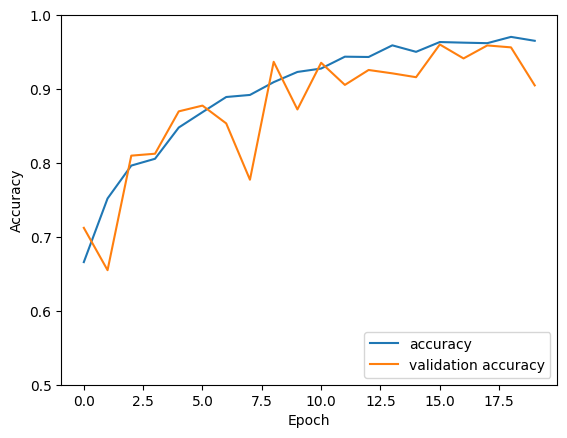

In [ ]:
import matplotlib.pyplot as plt

#Evaluation

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

#Transfer Learning

##EfficientNetV2B0 model

In [ ]:
#EfficientNetV2B0

import tensorflow as tf
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B0
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

base_model = EfficientNetV2B0(input_shape=(128, 128, 3), include_top=False, weights= 'imagenet')
base_model.trainable = False        # Freeze the base model

# Add our own classifier on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_dataset, epochs=50, validation_data=val_dataset)

# Step 5: Evaluate on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy:.2f}")

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 155s 626ms/step - accuracy: 0.5031 - loss: 1.2438 - val_accuracy: 0.6921 - val_loss: 0.8110
Epoch 2/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 139s 609ms/step - accuracy: 0.6819 - loss: 0.7481 - val_accuracy: 0.7591 - val_loss: 0.5824
Epoch 3/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 158s 686ms/step - accuracy: 0.7302 - loss: 0.6470 - val_accuracy: 0.7858 - val_loss: 0.5254
Epoch 4/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 187s 619ms/step - accuracy: 0.7364 - loss: 0.6055 - val_accuracy: 0.7793 - val_loss: 0.4983
Epoch 5/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 141s 611ms/step - accuracy: 0.7506 - loss: 0.5880 - val_accuracy: 0.7962 - val_loss: 0.4708
Epoch 6/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 137s 604ms/step - accuracy: 0.7501 - loss: 0.5944 - val_accuracy: 0.7923 - val_loss: 0.4563
Epoch 7/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 157s 677ms/step - accuracy: 0.7649 - loss: 0.5659 - val_accuracy: 0.8177 - val_loss: 0.4424
Epoch 8/50
224/224 ━━━━━━

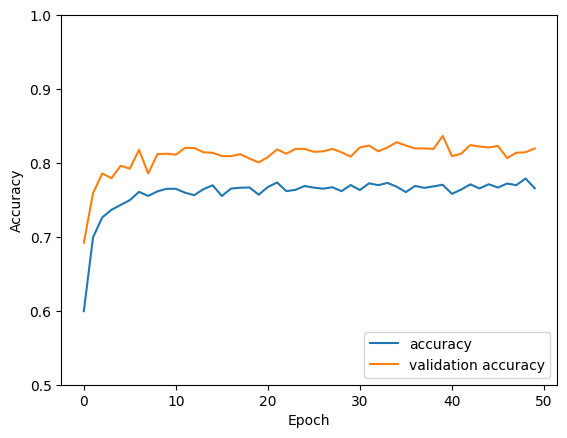

In [ ]:
#Evaluation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

##VGG19 model

In [ ]:
# VGG19

import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

base_model = VGG19(input_shape=(128, 128, 3), include_top=False, weights= 'imagenet')
base_model.trainable = False        # Freeze the base model

# Add our own classifier on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_dataset, epochs=50, validation_data=val_dataset)

# Step 5: Evaluate on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy:.2f}")

**Running the code in a different notebook. VGG19 was really slow, taking hours to work, so only 11 epochs were able to be completed.**

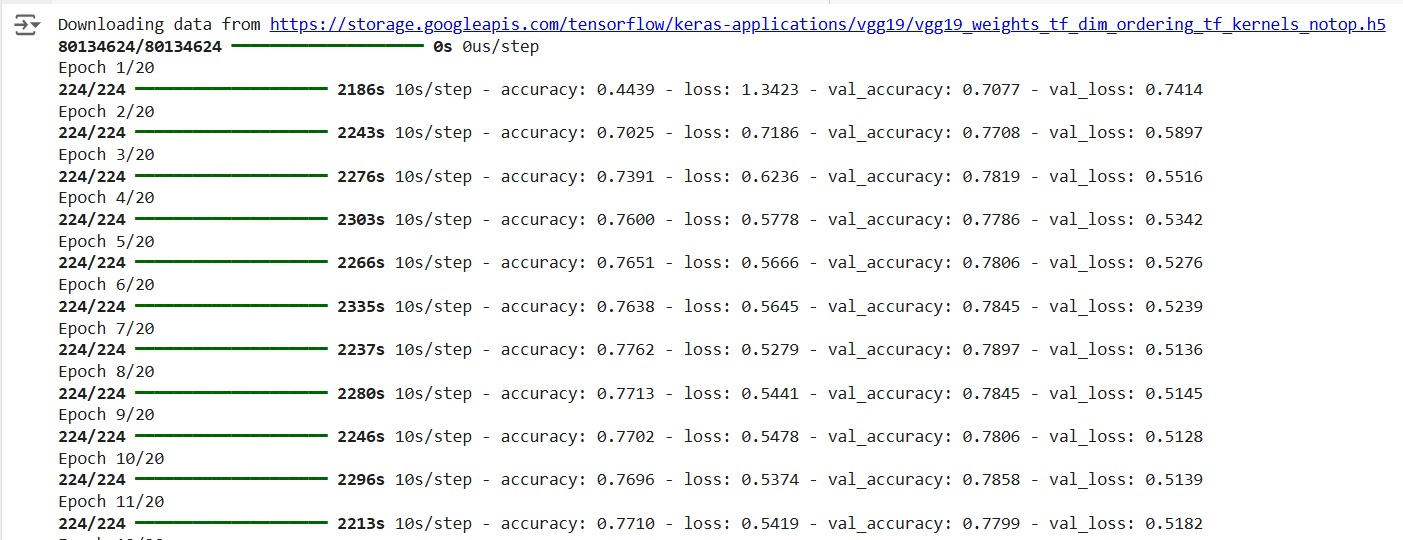

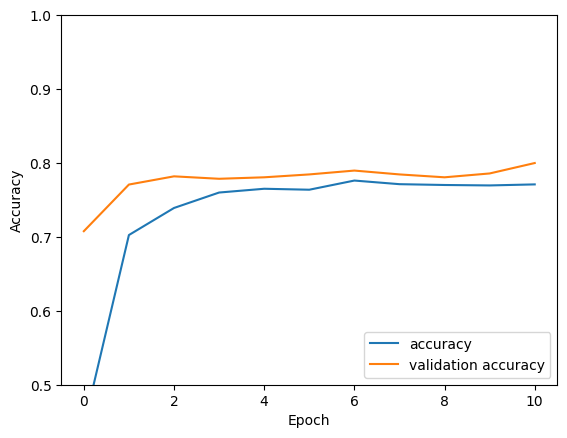

In [ ]:
#Evaluation

acc = [0.4439,0.7025,0.7391,0.7600,0.7651,0.7638,0.7762,0.7713,0.7702,0.7696,0.7710]
val_acc = [0.7077,0.7708,0.7819,0.7786,0.7806,0.7845,0.7897,0.7845,0.7806,0.7858,0.7999]

plt.plot(acc, label='accuracy')
plt.plot(val_acc, label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

##InceptionV3 model

In [ ]:
# InceptionV3

import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

base_model = InceptionV3(input_shape=(128, 128, 3), include_top=False, weights= 'imagenet')
base_model.trainable = False        # Freeze the base model

# Add our own classifier on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_dataset, epochs=50, validation_data=val_dataset)

# Step 5: Evaluate on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy:.2f}")

Epoch 1/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 308s 1s/step - accuracy: 0.4815 - loss: 1.2836 - val_accuracy: 0.6849 - val_loss: 0.8179
Epoch 2/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 285s 1s/step - accuracy: 0.6566 - loss: 0.8544 - val_accuracy: 0.7174 - val_loss: 0.6946
Epoch 3/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 351s 1s/step - accuracy: 0.6945 - loss: 0.7570 - val_accuracy: 0.7292 - val_loss: 0.6673
Epoch 4/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 288s 1s/step - accuracy: 0.7199 - loss: 0.6809 - val_accuracy: 0.7428 - val_loss: 0.6212
Epoch 5/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 360s 1s/step - accuracy: 0.7185 - loss: 0.6940 - val_accuracy: 0.7266 - val_loss: 0.6337
Epoch 6/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 281s 1s/step - accuracy: 0.7285 - loss: 0.6715 - val_accuracy: 0.7630 - val_loss: 0.5822
Epoch 7/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 321s 1s/step - accuracy: 0.7301 - loss: 0.6595 - val_accuracy: 0.7559 - val_loss: 0.5898
Epoch 8/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 276s 1s/step - accuracy: 0.7242 - loss: 0.6544 - val_accu

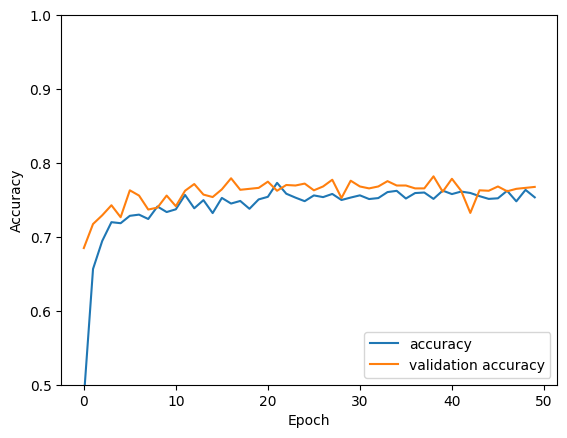

In [ ]:
#Evaluation

acc = [0.4815, 0.6566, 0.6945, 0.7199, 0.7185, 0.7285, 0.7301, 0.7242, 0.7411,
    0.7336, 0.7373, 0.7567, 0.7387, 0.7497, 0.7322, 0.7527, 0.7451, 0.7486,
    0.7380, 0.7507, 0.7542, 0.7731, 0.7584, 0.7531, 0.7483, 0.7561, 0.7538,
    0.7581, 0.7499, 0.7532, 0.7562, 0.7512, 0.7525, 0.7606, 0.7623, 0.7519,
    0.7593, 0.7600, 0.7514, 0.7626, 0.7579, 0.7613, 0.7594, 0.7551, 0.7514,
    0.7522, 0.7624, 0.7481, 0.7636, 0.7535]

val_acc = [0.6849, 0.7174, 0.7292, 0.7428, 0.7266, 0.7630, 0.7559, 0.7370, 0.7396,
                0.7559, 0.7415, 0.7624, 0.7715, 0.7572, 0.7539, 0.7643, 0.7793, 0.7637,
                0.7650, 0.7663, 0.7747, 0.7624, 0.7702, 0.7695, 0.7721, 0.7630, 0.7682,
                0.7773, 0.7526, 0.7760, 0.7682, 0.7656, 0.7682, 0.7754, 0.7695, 0.7695,
                0.7656, 0.7656, 0.7819, 0.7611, 0.7786, 0.7624, 0.7324, 0.7630, 0.7624,
                0.7682, 0.7617, 0.7650, 0.7663, 0.7676]

plt.plot(acc, label='accuracy')
plt.plot(val_acc, label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()